In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Data Gathering

In [2]:
df_Attrition = pd.read_csv('../data/ABNB - Attrition.csv', low_memory = False)
df_ZTP = pd.read_csv('../data/ABNB - ZTP.csv')

In [3]:
df_Attrition.shape

(21752, 83)

In [4]:
# check rate of null
df_Attrition.isna().sum()/df_Attrition.shape[0]

Employement_Status_Latest    0.000000
Employment_Status            0.000000
Date_Resignation             0.560684
EID                          0.999494
Name                         0.000000
                               ...   
Adherence_Discount           0.733772
BCP_Stat                     0.000000
Roster_Channel               0.034526
Latest_Renaissance_Tenure    0.571304
Tenure_Type                  0.000000
Length: 83, dtype: float64

In [5]:
df_Attrition.head()

Employement_Status_Latest Employment_Status Date_Resignation  EID  \
0                    Active            Active              NaN  NaN   
1                    Active            Active              NaN  NaN   
2                    Active            Active              NaN  NaN   
3                  Inactive            Active       2022-11-14  NaN   
4                  Inactive            Active       2022-11-14  NaN   

                       Name                            Role  \
0      Cardona, Delfin John  Customer Experience Specialist   
1  Aguilar, Christian Roque  Customer Experience Specialist   
2      Tan, Romeo Christian  Customer Experience Specialist   
3       Ruiles, Vernie Jean  Customer Experience Specialist   
4           Generoso, Marie  Customer Experience Specialist   

       Latest_Team_Leader   Latest_Operations_Manager        Skill Region  \
0            Sarno, Ariel  Napeñas, Von Mychal Keaton  Airventures    NaN   
1  Montes, Maria Cristina         Carse, Frank Nerwin           CE   EMEA   
2          Africano, Gean              Amplayo, Mariz           CE    NaN   
3        Dacles, Rose Ann              Amplayo, Mariz           CE    NaN   
4        Manuit, Jennifer              Amplayo, Mariz           CE    NaN   

   ... Most_Improved_Rank Tagging Performance_Tagging  ZTP_Discount  \
0  ...                1.0      Q4                 NaN           NaN   
1  ...                NaN  Top 5%             Top 10%           NaN   
2  ...                NaN  Top 5%             Top 10%           NaN   
3  ...                NaN  Top 5%             Top 10%           NaN   
4  ...                NaN  Top 5%             Top 10%           NaN   

   Attendance_Discount  Adherence_Discount  BCP_Stat  Roster_Channel  \
0                  25%                 25%       WFH          Phones   
1                  NaN                 NaN       WFH       Live Chat   
2                  25%                 NaN       WFH          Phones   
3                  NaN                 NaN       WFH          Phones   
4                  NaN                 25%       WFH          Phones   

   Latest_Renaissance_Tenure  Tenure_Type  
0                      31-60         Ramp  
1                        NaN      Tenured  
2                     91-180      Tenured  
3                     91-180      Tenured  
4                     91-180      Tenured  

[5 rows x 83 columns]

In [6]:
df_ZTP.shape

(8884, 23)

In [7]:
# check rate of null
df_ZTP.isna().sum()/df_ZTP.shape[0]

M                                     0.000000
W                                     0.000000
Review_Date                           0.000000
Source                                0.000000
Tier__Do_Not_Delete_                  0.000000
Region                                0.558195
Team_Lead__Do_Not_Delete_             0.000000
Operations_Manager__Do_Not_Delete_    0.000000
Ambassador_Name                       0.000000
TID_in_NICE                           0.029941
Reference_TID                         0.964093
Causal_Factor                         0.000000
Sanction                              0.000000
Status                                0.000000
Description                           0.004840
Quality_Evaluator                     0.412427
Hit_Category                          0.000000
Site                                  0.000000
Violation_Category                    0.000000
Remarks                               0.226475
Coaching_Comments                     0.832846
Next_Action  

In [8]:
df_ZTP.head()

M   W Review_Date                Source Tier__Do_Not_Delete_ Region  \
0  February   7  2022-02-08       Service Promise   Cancellations Lite    NaN   
1  February   7  2022-02-09       Service Promise   Cancellations Lite    NaN   
2  February   8  2022-02-14       Service Promise   Cancellations Lite    NaN   
3     March  13  2022-03-22  Disconnection Report   Cancellations Lite    NaN   
4     March  13  2022-03-21  Disconnection Report   Cancellations Lite    NaN   

  Team_Lead__Do_Not_Delete_ Operations_Manager__Do_Not_Delete_  \
0         Solon, Edward Den                       Barro, Joven   
1         Solon, Edward Den                       Barro, Joven   
2         Solon, Edward Den                       Barro, Joven   
3        Martin, Bailey Jed                       Barro, Joven   
4        Martin, Bailey Jed                       Barro, Joven   

      Ambassador_Name  TID_in_NICE  ...  Status  \
0      Manos, Reynard  2.02003E+12  ...  Closed   
1      Manos, Reynard  2.02003E+12  ...  Closed   
2     Booc, Genevieve  2.02003E+12  ...  Closed   
3  Benabaye, Giovanni  2.02004E+12  ...  Closed   
4   Rodriguez, Leonel  2.02004E+12  ...  Closed   

                                         Description Quality_Evaluator  \
0  Call ID 020S87GTRS8T12LM78SH5B5AES00ETR2\nCall...               NaN   
1  Call ID: 020S87GTRS8T12LM78SH5B5AES00F0GP_591c...               NaN   
2  Call ID 01PQDLGTRC8T12KB5OSH5B5AES00JEER 3:15 ...               NaN   
3  Call and/or ticket avoidance (as distinct from...               NaN   
4  Excessive hold time >5m\nThe user was on hold ...               NaN   

      Hit_Category  Site  Violation_Category  \
0  Professionalism  Cebu  Airbnb ZT - Yellow   
1  Professionalism  Cebu  Airbnb ZT - Yellow   
2  Professionalism  Cebu  Airbnb ZT - Yellow   
3  Professionalism  Cebu  Airbnb ZT - Orange   
4  Professionalism  Cebu  Airbnb ZT - Yellow   

                                             Remarks  \
0  15 Feb - note received that SA has been coache...   
1  15 Feb - note received that SA has been coache...   
2  Feb 24 - isolated case, updated comments with ...   
3  Apr 2 - sent email to Quality for information ...   
4  03/30/22- Closing the hit since the agent has ...   

                                   Coaching_Comments Next_Action Purging_Date  
0  https://docs.google.com/spreadsheets/d/1sZLrri...      Closed          NaN  
1  https://docs.google.com/spreadsheets/d/1sZLrri...      Closed          NaN  
2  1.Pre-coaching assessment:\nPreviously agreed ...      Closed          NaN  
3                                                NaN      Closed          NaN  
4  The following details were noted: \nSummary: T...      Closed          NaN  

[5 rows x 23 columns]

# Data Gathering

In [9]:
df_ZTP['Causal_Factor'].unique()

array(['Excessive hold or mute (5+ minutes)',
       'Call and/or ticket avoidance',
       'Disclosed user information (PII) improperly',
       'Refused request for a supervisor',
       'Improperly disclosed user information (PII)',
       'Failure to authenticate (Outbound)',
       'Call and/or Ticket avoidance',
       'References to religion including god that are not part of the conversation',
       'Failure to authenticate (Inbound)',
       'Excessive hold time or mute >5m',
       'Tone is thoroughly disinterested, dismissive or unprofessional, Call and/or ticket avoidance, Put user on hold until user disconnected (call avoidance)',
       'Tone is thoroughly disinterested, dismissive or unprofessional',
       'Refused to action a request for a supervisor',
       'Client and TDCX-related Processes and Procedures',
       'Argued with user', 'Harassed user (minor)',
       'Lack of care/disinterested tone',
       'Disclosed sensitive Airbnb information (including other Su

## SKIP FOR NOW

Since column 'CAUSAL_FACTOR' is messy, will make it a cleaner version

In [10]:
#def causal_factor(value):
#    if value == 'Client and TDCX-related Processes and Procedures':
#        return 'Client and TDCX-related Processes and Procedures'
#    elif value == 'Call and/or ticket avoidance':
#        return 'Call and/or ticket avoidance' 
#    elif value == 'Client and TDCX related \nProcesses and  Procedures\n':
#        return 'Client and TDCX-related Processes and Procedures'
#    elif value == 'Call and/or ticket avoidance (as distinct from ownership)':
#        return 'Call and/or ticket avoidance'
#    elif value == 'Failure to authenticate (Outbound), Disclosed user information (PII) improperly':
#        return 'Failure to authenticate & Disclosed user information (PII) improperly'
#    elif value == 'Client and TDCX-Related Processes and Procedures':
#        return 'Client and TDCX-related Processes and Procedures'
#    elif value == 'Failure to authenticate (Outbound), Failure to authenticate (Inbound)':
#        return 'Failure to authenticate'
#    elif value == 'Failure to authenticate (Inbound), Failure to authenticate (Outbound)':
#        return 'Failure to authenticate'
#    elif value == 'Failure to authenticate (Inbound)':
#        return 'Failure to authenticate'
#    elif value == 'Failure to authenticate (Outbound)':
#        return 'Failure to authenticate'
#    elif value == 'SA failed to acquire the full name of the account. June Lake Premier Reservations June Lake, CA and what the caller provided was June Lake Premier Reservations.':
#        return 'Client and TDCX-related Processes and Procedures'
#    elif value == 'Disclosed user information (PII) improperly':
#        return 'Disclosed user information (PII) improperly'
#    elif value == 'Authentication Failure':
#        return 'Failure to authenticate'
#    elif value == 'Wrongly took an action on a user account':
#        return 'Client and TDCX-related Processes and Procedures'
#    elif value == 'Failed to protect sensitive information':
#        return 'Disclosed user information (PII) improperly'
#    elif value == 'Improperly disclosed user information (PII)':
#        return 'Disclosed user information (PII) improperly'
#    elif value == 'Failed to authenticate (outbound)':
#        return 'Failure to authenticate'
#    elif value == 'Disclosed sensitive Airbnb information (including other Agent details)':
#        return 'Disclosed sensitive Airbnb information'
#    elif value == 'Disclosed sensitive Airbnb information (including other Support Ambassador details)':
#        return 'Disclosed sensitive Airbnb information'
#    elif value == '(blank)':
#        return ''
#    elif value == 'Accessed user account improperly':
#        return 'Improperly accessed user accounts'
#    elif value == 'Failed to authenticate (inbound)':
#        return 'Failure to authenticate'
#    elif value == 'Disclosed sensitive Airbnb information (including other Agent details) (0.00)':
#        return 'Disclosed sensitive Airbnb information'
#    elif value == 'SA failed to send the failed authentication notification to the user as an email. The SA sent it as a message instead. According to the WF: ¨Send the macro exclusively via email¨ https://confluence.airbnb.biz/display/LEN/Account+Authentication#expand-GeneralcallerNewuser':
#        return 'Failure to authenticate'
#    elif value == 'Failed to authenticate (inbound), Improperly accessed user accounts':
#        return 'Failure to authenticate & Improperly accessed user accounts'
#    elif value == 'Failed to authenticate (Outbound)':
#        return 'Failure to authenticate'
#    elif value == 'Failed to authenticate (inbound), Accessed user accounts improperly':
#        return 'Failure to authenticate & Improperly accessed user accounts'
#    elif value == 'Disclosed user information (PII) improperly (0.00)':
#        return 'Disclosed user information (PII) improperly'
#    elif value == 'Failed to authenticate (inbound), Improperly disclosed user information (PII)':
#        return 'Failure to authenticate & Disclosed user information (PII) improperly'
#    elif value == 'Improperly disclosed user information (PII), Wrongly took an action on a user account':
#        return 'Disclosed user information (PII) improperly & Client and TDCX-related Processes and Procedures'
#    elif value == 'Disclosed sensitive Airbnb information':
#        return 'Disclosed sensitive Airbnb information'
#    elif value == 'Failure to authenticate (Inbound) (0.00)':
#        return 'Failure to authenticate'
#    else:
#        return ''
    
#df['Causal_Factor'] = df['CAUSAL_FACTOR'].map(causal_factor)

In [11]:
#df['Causal_Factor'].unique()

In [12]:
df_ZTP['Tier__Do_Not_Delete_'].unique()

array(['Cancellations Lite', 'R1', 'R2', 'DSS', 'DMHS', 'CE',
       'Enterprise Support', 'Airventures'], dtype=object)

In [13]:
df_ZTP['Hit_Category'].unique()

array(['Professionalism', 'Compliance', 'Data Privacy/ Compliance',
       'Others'], dtype=object)

In [14]:
df_ZTP['Violation_Category'].unique()

array(['Airbnb ZT - Yellow', 'Airbnb ZT - Orange', 'Airbnb ZT - Red'],
      dtype=object)

# Exploratory Data Analysis

In [15]:
df_ZTP['Review_Date'].min()

'2021-05-12'

In [16]:
df_ZTP['Review_Date'].max()

'2022-11-12'

ZTP Data is from May 12, 2021 up to Nov 12, 2022

In [17]:
df_Attrition['Date_Month'].min()

'2022-01-01'

In [18]:
df_Attrition['Date_Month'].max()

'2022-11-01'

Attrition Data is from Jan to Nov 2022

In [22]:
df_ZTP = df_ZTP[df_ZTP['Review_Date'] >= '2022-01-01']

To make the data coherent, both data frames will be from Jan to Nov 2022

In [23]:
df_ZTP['Causal_Factor'].value_counts().head(20)

Call and/or ticket avoidance                                                           3139
Excessive hold or mute (5+ minutes)                                                    1416
Failure to authenticate (Inbound)                                                       601
Failure to authenticate (Outbound)                                                      472
Improperly disclosed user information (PII)                                             311
Excessive hold time or mute >5m                                                         277
Failed to authenticate (inbound)                                                        249
Refused to action a request for a supervisor                                            170
Failed to authenticate (outbound)                                                       144
Call and/or ticket avoidance (as distinct from ownership)                               124
Disclosed user information (PII) improperly                                     

<AxesSubplot:>

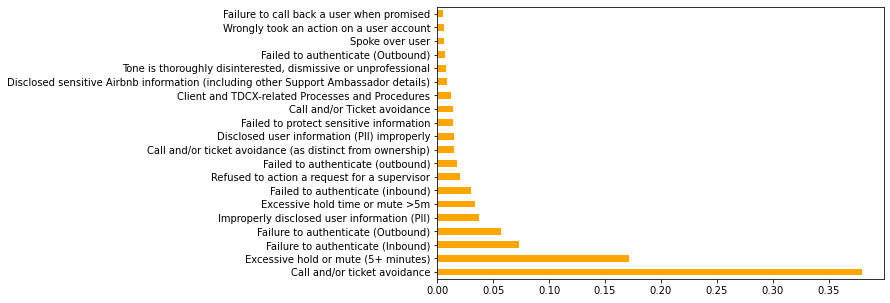

In [24]:
df_ZTP['Causal_Factor'].value_counts(normalize = True).head(20).plot(kind='barh', figsize=(8,5), color='orange')

Most of ABNB ZTP is Call and/or ticket avoidance

In [25]:
df_ZTP['Tier__Do_Not_Delete_'].value_counts()

CE                    2592
R2                    2083
R1                    1173
Cancellations Lite     962
DSS                    754
DMHS                   598
Enterprise Support      96
Airventures              3
Name: Tier__Do_Not_Delete_, dtype: int64

In [26]:
df_ZTP['Tier__Do_Not_Delete_'].value_counts()/df_Attrition['Skill'].value_counts()

Airventures            0.428571
CE                     0.467448
Cancellations Lite     0.467899
DMHS                   3.232432
DSS                         NaN
Dedicated Superhost         NaN
Enterprise Support     0.150943
R1                     0.209952
R2                     0.345096
dtype: float64

In [28]:
df_ZTP['Tier__Do_Not_Delete_'].value_counts(normalize = True).plot(kind='barh', figsize=(8,5), color='orange')

<AxesSubplot:>

In [29]:
df_ZTP.groupby(['Tier__Do_Not_Delete_', 'Causal_Factor'])['Causal_Factor'].count().sort_values(ascending = False).reset_index(name = "dropme")

Tier__Do_Not_Delete_                                      Causal_Factor  \
0                     CE                       Call and/or ticket avoidance   
1                     R2                       Call and/or ticket avoidance   
2                     R1                       Call and/or ticket avoidance   
3                     CE                Excessive hold or mute (5+ minutes)   
4     Cancellations Lite                       Call and/or ticket avoidance   
..                   ...                                                ...   
364   Enterprise Support  Failure to authenticate (Inbound), Failure to ...   
365   Enterprise Support                              Harassed user (minor)   
366   Enterprise Support  Improperly disclosed user information (PII), W...   
367   Enterprise Support                                    Spoke over user   
368          Airventures                       Call and/or ticket avoidance   

     dropme  
0      1148  
1       707  
2       543  
3       486  
4       373  
..      ...  
364       1  
365       1  
366       1  
367       1  
368       1  

[369 rows x 3 columns]

In [30]:
df_ZTP[df_ZTP['Tier__Do_Not_Delete_'] == 'CE']['Causal_Factor'].value_counts()

Call and/or ticket avoidance                                                                                                                                                       1148
Excessive hold or mute (5+ minutes)                                                                                                                                                 486
Excessive hold time or mute >5m                                                                                                                                                     175
Improperly disclosed user information (PII)                                                                                                                                         119
Failure to authenticate (Inbound)                                                                                                                                                   110
                                                                                

<AxesSubplot:>

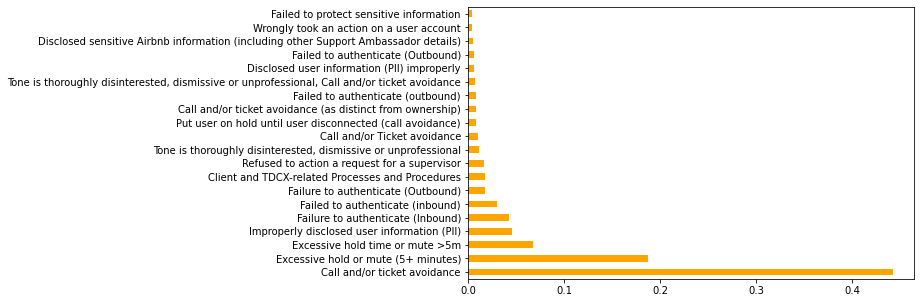

In [32]:
df_ZTP[df_ZTP['Tier__Do_Not_Delete_'] == 'CE']['Causal_Factor'].value_counts(normalize = True).head(20).plot(kind='barh', figsize=(8,5), color='orange')

Most of ABNB CE ZTP is Call and/or ticket avoidance

In [33]:
df_ZTP[df_ZTP['Tier__Do_Not_Delete_'] == 'R1']['Causal_Factor'].value_counts()

Call and/or ticket avoidance                                                                                                                               543
Excessive hold or mute (5+ minutes)                                                                                                                        169
Improperly disclosed user information (PII)                                                                                                                 55
Failure to authenticate (Inbound)                                                                                                                           54
Failure to authenticate (Outbound)                                                                                                                          50
Excessive hold time or mute >5m                                                                                                                             49
Failed to authenticate (inbound)              

<AxesSubplot:>

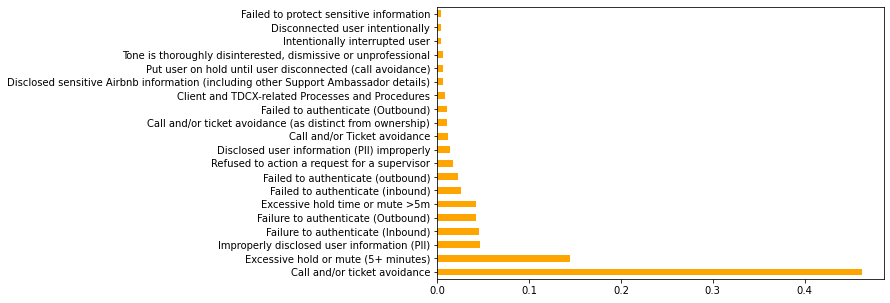

In [38]:
df_ZTP[df_ZTP['Tier__Do_Not_Delete_'] == 'R1']['Causal_Factor'].value_counts(normalize = True).head(20).plot(kind='barh', figsize=(8,5), color='orange')

In [35]:
df_ZTP[df_ZTP['Tier__Do_Not_Delete_'] == 'R2']['Causal_Factor'].value_counts()

Call and/or ticket avoidance                                                  707
Excessive hold or mute (5+ minutes)                                           373
Failure to authenticate (Outbound)                                            184
Failure to authenticate (Inbound)                                             179
Failed to authenticate (outbound)                                              54
                                                                             ... 
Failed to protect sensitive information, Failure to authenticate (Inbound)      1
Argued with, intentionally interrupted or spoke over the user                   1
Name Calling, condescending, mocked or laughed at user or others                1
References to religion                                                          1
Disclosed agent’s name and department details                                   1
Name: Causal_Factor, Length: 73, dtype: int64

In [37]:
df_ZTP[df_ZTP['Tier__Do_Not_Delete_'] == 'R2']['Causal_Factor'].value_counts(normalize = True).head(20).plot(kind='barh', figsize=(8,5), color='orange')

<AxesSubplot:>

Most of ABNB R2 ZTP is Call and/or ticket avoidance

In [39]:
print(df_ZTP[df_ZTP['Violation_Category'] == 'Airbnb ZT - Yellow']['Causal_Factor'].unique())

['Excessive hold or mute (5+ minutes)'
 'References to religion including god that are not part of the conversation'
 'Excessive hold time or mute >5m'
 'Tone is thoroughly disinterested, dismissive or unprofessional'
 'Harassed user (minor)' 'Lack of care/disinterested tone'
 'Disclosed sensitive Airbnb information (including other Support Ambassador details)'
 'Dismissive attitude towards the user' 'Used discriminatory language'
 'Failure to call back a user when promised'
 'Call and/or Ticket avoidance' 'Spoke over user'
 'Dismissive attitude toward user issue' 'Harassed user'
 'Used terms of endearment' 'Call and/or ticket avoidance'
 'Improperly accessed user accounts'
 'Wrongly took an action on a user account' 'References to religion'
 'Client and TDCXrelated\nProcesses and\nProcedures'
 'Refused to action a request for a supervisor'
 'Tone is thoroughly disinterested, dismissive or unprofessional, Call and/or ticket avoidance'
 'Client and TDCX-Related Processes and Procedures'

In [40]:
print(df_ZTP[df_ZTP['Violation_Category'] == 'Airbnb ZT - Orange']['Causal_Factor'].unique())

['Call and/or ticket avoidance'
 'Disclosed user information (PII) improperly'
 'Refused request for a supervisor'
 'Improperly disclosed user information (PII)'
 'Failure to authenticate (Outbound)' 'Call and/or Ticket avoidance'
 'Failure to authenticate (Inbound)'
 'Tone is thoroughly disinterested, dismissive or unprofessional, Call and/or ticket avoidance, Put user on hold until user disconnected (call avoidance)'
 'Refused to action a request for a supervisor'
 'Client and TDCX-related Processes and Procedures' 'Argued with user'
 'Failed to protect sensitive information'
 'Argued with, intentionally interrupted or spoke over the user, Tone is thoroughly disinterested, dismissive or unprofessional'
 'Wrongly took an action on a user account'
 'Argued with, intentionally interrupted or spoke over user'
 'Argued with, intentionally interrupted or spoke over user, Tone is thoroughly disinterested, dismissive or unprofessional'
 'Failure to call back a user when promised'
 'Failure t

In [41]:
print(df_ZTP[df_ZTP['Violation_Category'] == 'Airbnb ZT - Red']['Causal_Factor'].unique())

['Used discriminatory language'
 'Unauthorized user account access or user privacy policy violation'
 'Unauthorized disclosure of company data'
 'Disconnected user intentionally'
 'Failed to protect sensitive information'
 'Unauthorized user account access' 'Harassed user (severe)'
 'Accessed user account improperly' 'Threatened or coerced user'
 'Laughed at user'
 'Spoke over user, Used profanity (directed at user or other involved parties)']


## ZTP Distribution

In [103]:
df_Distribution = df_Attrition[['Name', 'Date_Month', 'End_of_Month', 'Hire_Date', 'Yellow', 'Orange', 'Red', 'Skill', 'Tagging']]

In [104]:
df_Distribution[['Yellow', 'Orange', 'Red']] = df_Distribution[['Yellow', 'Orange', 'Red']].fillna(0)
df_Distribution['ZTP'] = df_Distribution['Yellow'] + df_Distribution['Orange'] + df_Distribution['Red']

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\3096480118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Distribution[['Yellow', 'Orange', 'Red']] = df_Distribution[['Yellow', 'Orange', 'Red']].fillna(0)
C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\3096480118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Distribution['ZTP'] = df_Distribution['Yellow'] + df_Distribution['Orange'] + df_Distribution['Red']


In [105]:
df_Distribution

Name  Date_Month End_of_Month   Hire_Date  Yellow  \
0          Cardona, Delfin John  2022-11-01   2022-11-30  2019-05-06     0.0   
1      Aguilar, Christian Roque  2022-11-01   2022-11-30  2021-05-16     0.0   
2          Tan, Romeo Christian  2022-11-01   2022-11-30  2022-05-19     0.0   
3           Ruiles, Vernie Jean  2022-11-01   2022-11-30  2022-06-09     0.0   
4               Generoso, Marie  2022-11-01   2022-11-30  2022-06-11     0.0   
...                         ...         ...          ...         ...     ...   
21747       Garcia, Kathryn Ann  2022-01-01   2021-12-31         NaN     0.0   
21748           Magbago, Chelou  2022-01-01   2021-12-31         NaN     0.0   
21749           Monoy, Rochelle  2022-01-01   2022-01-31         NaN     0.0   
21750           Paler, Queennie  2022-01-01   2021-12-31         NaN     0.0   
21751    Policarpio, Jalen Yana  2022-01-01   2022-01-31         NaN     0.0   

       Orange  Red        Skill Tagging  ZTP  
0         0.0  0.0  Airventures      Q4  0.0  
1         0.0  0.0           CE  Top 5%  0.0  
2         0.0  0.0           CE  Top 5%  0.0  
3         0.0  0.0           CE  Top 5%  0.0  
4         1.0  0.0           CE  Top 5%  1.0  
...       ...  ...          ...     ...  ...  
21747     0.0  0.0           R2      Q4  0.0  
21748     0.0  0.0           R2      Q4  0.0  
21749     0.0  0.0           R2      Q4  0.0  
21750     0.0  0.0           R2      Q4  0.0  
21751     0.0  0.0           R2      Q4  0.0  

[21752 rows x 10 columns]

Skill Distribution

In [64]:
df_Skill = df_Distribution[df_Distribution['Skill'].isin(["CE", "R1", "R2"])].groupby(['Skill'])['Yellow', 'Orange', 'Red'].apply(lambda x : x.astype(int).sum())

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\2452107209.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_Skill = df_Distribution[df_Distribution['Skill'].isin(["CE", "R1", "R2"])].groupby(['Skill'])['Yellow', 'Orange', 'Red'].apply(lambda x : x.astype(int).sum())


In [82]:
df_Skill

Yellow  Orange  Red
Skill                     
CE        921    2288   17
R1        446    1543   22
R2        154    1024   14

In [81]:
df_Skill.plot(kind = 'barh',
              figsize = (8,5), 
              color = ["Yellow", "Orange", "Red"],
              edgecolor = "Black")

plt.title("Number of ZTP (per Violation Category) per Skill")
plt.ylabel("Skill")
plt.xlabel("Number of ZTP")

Text(0.5, 0, 'Number of ZTP')

Performance Distribution

In [83]:
df_Performance = df_Distribution.groupby(['Tagging'])['Yellow', 'Orange', 'Red'].apply(lambda x : x.astype(int).sum())

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\1596577921.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_Performance = df_Distribution.groupby(['Tagging'])['Yellow', 'Orange', 'Red'].apply(lambda x : x.astype(int).sum())


In [85]:
df_Performance.index=["Top 5%", "5% - 10%", "10% - 20%", "20% - 25%", "Q2", "Q3", "Q4"]

In [87]:
df_Performance

Yellow  Orange  Red
Top 5%        197     650    5
5% - 10%      105     358    6
10% - 20%     104     320    1
20% - 25%     524    1693   21
Q2            486    1707   18
Q3            369    1225   10
Q4             73     262    2

In [88]:
df_Performance.plot(kind = 'barh',
                    figsize = (8,5),
                    color = ["Yellow", "Orange", "Red"],
                    edgecolor = "Black")

plt.title("Number of ZTP (per Violation Category) per Performance Tagging")
plt.ylabel("Performance Tagging")
plt.xlabel("Number of ZTP")

Text(0.5, 0, 'Number of ZTP')

Tenure Distribution

In [120]:
df_Hire = df_Attrition[['Name', 'Hire_Date']][df_Attrition['Hire_Date'].notna()].drop_duplicates()

In [121]:
df_Tenure = df_Distribution

In [122]:
df_Tenure = df_Tenure.set_index('Name')
df_Hire = df_Hire.set_index('Name')
df_Tenure['Hire_Date'] = df_Tenure['Hire_Date'].fillna(df_Hire['Hire_Date'])
df_Tenure = df_Tenure[df_Tenure['Hire_Date'].notna()]

In [123]:
df_Tenure['End_of_Month'] = pd.to_datetime(df_Tenure['End_of_Month'])
df_Tenure['Hire_Date'] = pd.to_datetime(df_Tenure['Hire_Date'])
df_Tenure['Tenure'] = (df_Tenure['End_of_Month'] - df_Tenure['Hire_Date']) / np.timedelta64(1, 'D')

In [124]:
df_Tenure.loc[(df_Tenure['Tenure'] >= 0) & 
                    (df_Tenure['Tenure'] <= 30), 'Tenure Bucket'] = "0-30"
df_Tenure.loc[(df_Tenure['Tenure'] >= 31) & 
                    (df_Tenure['Tenure'] <= 60), 'Tenure Bucket'] = "31-60"
df_Tenure.loc[(df_Tenure['Tenure'] >= 61) &
                    (df_Tenure['Tenure'] <= 90), 'Tenure Bucket'] = "61-90"
df_Tenure.loc[(df_Tenure['Tenure'] >= 91) & 
                    (df_Tenure['Tenure'] <= 180), 'Tenure Bucket'] = "91-180"
df_Tenure.loc[(df_Tenure['Tenure'] >= 181) & 
                    (df_Tenure['Tenure'] <= 365), 'Tenure Bucket'] = "181-365"
df_Tenure.loc[(df_Tenure['Tenure'] > 365), 'Tenure Bucket'] = "365+"

In [125]:
df_Tenure = df_Tenure.groupby(['Tenure Bucket'])['Yellow', 'Orange', 'Red'].apply(lambda x : x.astype(int).sum())

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\2655019127.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_Tenure = df_Tenure.groupby(['Tenure Bucket'])['Yellow', 'Orange', 'Red'].apply(lambda x : x.astype(int).sum())


In [126]:
df_Tenure.index=["31-60", "61-90", "91-180", "181-365", "365+"]

In [127]:
df_Tenure

Yellow  Orange  Red
31-60       215    1071   10
61-90       280     300    3
91-180      149    1138   12
181-365     501     778    3
365+        458    2109   18

In [128]:
df_Tenure.plot(kind = 'barh',
               figsize = (8,5),
               color = ["Yellow", "Orange", "Red"],
               edgecolor = "Black")

plt.title("Number of ZTP (per Violation Category) per Tenure Bucket")
plt.ylabel("Tenure Bucket")
plt.xlabel("Number of ZTP")

Text(0.5, 0, 'Number of ZTP')

## Understand when Employees Leave

Let's merge attrition and ZTP data. Get latest ZTP occurence vs Resignation date.

In [129]:
df_comparison = df_Attrition[['Name']].drop_duplicates()

In [130]:
df_comparison.shape

(3543, 1)

In [131]:
df_latestZTP = df_ZTP.sort_values(by = ['Review_Date'], ascending = False)
df_latestZTP = df_latestZTP.drop_duplicates(subset = 'Ambassador_Name', keep = 'first')

In [132]:
df_comparison = pd.merge(df_comparison, 
                         df_latestZTP[['Ambassador_Name', 'Review_Date']],
                         how = 'left',
                         left_on = 'Name', 
                         right_on = 'Ambassador_Name').drop('Ambassador_Name', axis = 1)

In [133]:
df_comparison

Name Review_Date
0         Cardona, Delfin John  2022-06-17
1     Aguilar, Christian Roque         NaN
2         Tan, Romeo Christian  2022-07-27
3          Ruiles, Vernie Jean  2022-09-17
4              Generoso, Marie  2022-11-08
...                        ...         ...
3538           Garcia, Jacklyn         NaN
3539       Garcia, Kathryn Ann         NaN
3540           Magbago, Chelou         NaN
3541           Paler, Queennie         NaN
3542    Policarpio, Jalen Yana         NaN

[3543 rows x 2 columns]

In [134]:
df_comparison.shape

(3543, 2)

In [135]:
df_latestAttrition = df_Attrition.sort_values(by = ['Date_Resignation'], ascending = False)
df_latestAttrition = df_latestAttrition.drop_duplicates(subset = 'Name', keep = 'first')

In [136]:
df_comparison = pd.merge(df_comparison, 
                         df_latestAttrition[['Name', 'Date_Resignation']],
                         how = 'left')

In [137]:
df_comparison.shape

(3543, 3)

In [138]:
df_comparison

Name Review_Date Date_Resignation
0         Cardona, Delfin John  2022-06-17              NaN
1     Aguilar, Christian Roque         NaN              NaN
2         Tan, Romeo Christian  2022-07-27              NaN
3          Ruiles, Vernie Jean  2022-09-17       2022-11-14
4              Generoso, Marie  2022-11-08       2022-11-14
...                        ...         ...              ...
3538           Garcia, Jacklyn         NaN       2022-01-05
3539       Garcia, Kathryn Ann         NaN              NaN
3540           Magbago, Chelou         NaN       2022-01-04
3541           Paler, Queennie         NaN       2022-01-25
3542    Policarpio, Jalen Yana         NaN       2021-12-29

[3543 rows x 3 columns]

In [139]:
df_comparison.loc[df_comparison['Review_Date'].isnull(), 'ZTP'] = 0
df_comparison.loc[~df_comparison['Review_Date'].isnull(), 'ZTP'] = 1

Since we want to know the relationship if getting a ZTP versus attrition, let's only focus on those who incrurred a ZTP

In [141]:
df_comparison = df_comparison[df_comparison['ZTP'] == 1]

In [142]:
df_comparison.loc[df_comparison['Date_Resignation'].isnull(), 'Attrition'] = 0
df_comparison.loc[~df_comparison['Date_Resignation'].isnull(), 'Attrition'] = 1

In [143]:
df_comparison['Review_Date'] = pd.to_datetime(df_comparison['Review_Date'])
df_comparison['Date_Resignation'] = pd.to_datetime(df_comparison['Date_Resignation'])

In [144]:
df_comparison['diff_days'] = (df_comparison['Date_Resignation'] - df_comparison['Review_Date']) / np.timedelta64(1, 'D')

In [145]:
df_comparison

Name Review_Date Date_Resignation  ZTP  Attrition  \
0     Cardona, Delfin John  2022-06-17              NaT  1.0        0.0   
2     Tan, Romeo Christian  2022-07-27              NaT  1.0        0.0   
3      Ruiles, Vernie Jean  2022-09-17       2022-11-14  1.0        1.0   
4          Generoso, Marie  2022-11-08       2022-11-14  1.0        1.0   
5         Abelardo, Johres  2022-01-13              NaT  1.0        0.0   
...                    ...         ...              ...  ...        ...   
3483         Varilla, Ruby  2022-01-29       2022-01-25  1.0        1.0   
3495        Zabala, Louise  2022-02-01       2022-01-31  1.0        1.0   
3508          Borja, Caryl  2022-01-11       2022-01-23  1.0        1.0   
3519         Eugenio, Karl  2022-01-05       2022-01-18  1.0        1.0   
3524         Perez, Alyssa  2022-01-30       2022-01-27  1.0        1.0   

      diff_days  
0           NaN  
2           NaN  
3          58.0  
4           6.0  
5           NaN  
...         ...  
3483       -4.0  
3495       -1.0  
3508       12.0  
3519       13.0  
3524       -3.0  

[2391 rows x 6 columns]

In [147]:
df_comparison[df_comparison['diff_days'] < 0].head(10)

Name Review_Date Date_Resignation  ZTP  Attrition  \
18   Banilad, Christian Jie  2022-09-20       2022-08-13  1.0        1.0   
62         Falco, Syra Gail  2022-05-20       2022-05-19  1.0        1.0   
88             Espina, Kaye  2022-10-14       2022-10-11  1.0        1.0   
126           Reyes, Alexis  2022-11-11       2020-06-04  1.0        1.0   
149        Nicosa, Feannmae  2022-09-27       2022-08-29  1.0        1.0   
173    Gallego, Vince Skyle  2022-09-27       2022-07-14  1.0        1.0   
174          Dalogdog, Lyca  2022-10-15       2022-02-07  1.0        1.0   
210      Montalbo, Jenerica  2022-08-29       2022-01-19  1.0        1.0   
285           Abella, Diane  2022-09-15       2022-06-19  1.0        1.0   
349      Condes, Fatima Lyn  2022-11-02       2022-06-24  1.0        1.0   

     diff_days  
18       -38.0  
62        -1.0  
88        -3.0  
126     -890.0  
149      -29.0  
173      -75.0  
174     -250.0  
210     -222.0  
285      -88.0  
349     -131.0

In [153]:
178/2391

0.07444583856127143

In [151]:
plt.figure(figsize=(10,5))
plt.xlabel("Difference between Resignation Date and Review Date")
plt.ylabel("Number of Employees")
df_comparison['diff_days'].hist(bins=100, color = "Orange")

<AxesSubplot:xlabel='Difference between Resignation Date and Review Date', ylabel='Number of Employees'>

In [155]:
df_comparison.loc[(df_comparison['diff_days'] < 0), 'Attrition Bucket'] = "Back Dated Review Date"
df_comparison.loc[df_comparison['diff_days'].isnull(), 'Attrition Bucket'] = "Did not resign"
df_comparison.loc[(df_comparison['diff_days'] == 0), 'Attrition Bucket'] = "Did not resign"
df_comparison.loc[(df_comparison['diff_days'] >= 1) & 
                  (df_comparison['diff_days'] <= 30), 'Attrition Bucket'] = "Within First Month"
df_comparison.loc[(df_comparison['diff_days'] >= 31) & 
                  (df_comparison['diff_days'] <= 60), 'Attrition Bucket'] = "Within Two Months"
df_comparison.loc[(df_comparison['diff_days'] >= 61) & 
                  (df_comparison['diff_days'] <= 90), 'Attrition Bucket'] = "Within Three Months"
df_comparison.loc[df_comparison['diff_days'] >= 91, 'Attrition Bucket'] = "After Three Months"

Text(0, 0.5, 'Attrition Bucket')

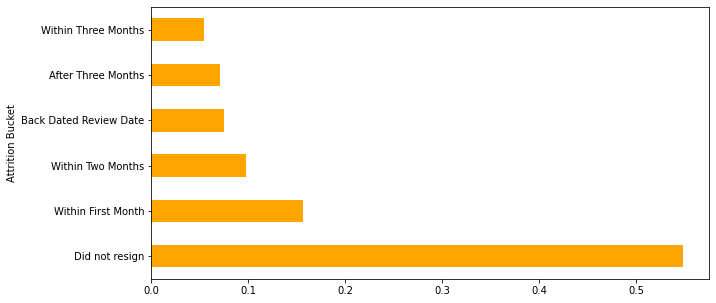

In [159]:
df_comparison['Attrition Bucket'].value_counts(normalize = True).plot(kind='barh', figsize=(10,5), color='orange')
plt.ylabel("Attrition Bucket")

## What if ZTP is a Yellow Category?

In [181]:
df_comparison_Yellow = df_Attrition[['Name']].drop_duplicates()

In [182]:
df_comparison_Yellow.shape

(3543, 1)

In [183]:
df_latestZTP = df_ZTP[df_ZTP['Violation_Category'] == 'Airbnb ZT - Yellow'].sort_values(by = ['Review_Date'], ascending = False)
df_latestZTP = df_latestZTP.drop_duplicates(subset = 'Ambassador_Name', keep = 'first')

In [184]:
df_comparison_Yellow = pd.merge(df_comparison_Yellow, 
                         df_latestZTP[['Ambassador_Name', 'Review_Date']],
                         how = 'left',
                         left_on = 'Name', 
                         right_on = 'Ambassador_Name').drop('Ambassador_Name', axis = 1)

In [185]:
df_comparison_Yellow.shape

(3543, 2)

In [186]:
df_latestAttrition = df_Attrition.sort_values(by = ['Date_Resignation'], ascending = False)
df_latestAttrition = df_latestAttrition.drop_duplicates(subset = 'Name', keep = 'first')

In [187]:
df_comparison_Yellow = pd.merge(df_comparison_Yellow, 
                         df_latestAttrition[['Name', 'Date_Resignation']],
                         how = 'left')

In [188]:
df_comparison_Yellow.shape

(3543, 3)

In [189]:
df_comparison_Yellow

Name Review_Date Date_Resignation
0         Cardona, Delfin John  2022-06-17              NaN
1     Aguilar, Christian Roque         NaN              NaN
2         Tan, Romeo Christian         NaN              NaN
3          Ruiles, Vernie Jean  2022-07-23       2022-11-14
4              Generoso, Marie  2022-08-19       2022-11-14
...                        ...         ...              ...
3538           Garcia, Jacklyn         NaN       2022-01-05
3539       Garcia, Kathryn Ann         NaN              NaN
3540           Magbago, Chelou         NaN       2022-01-04
3541           Paler, Queennie         NaN       2022-01-25
3542    Policarpio, Jalen Yana         NaN       2021-12-29

[3543 rows x 3 columns]

In [190]:
df_comparison_Yellow.loc[df_comparison_Yellow['Review_Date'].isnull(), 'ZTP'] = 0
df_comparison_Yellow.loc[~df_comparison_Yellow['Review_Date'].isnull(), 'ZTP'] = 1

Since we want to know the relationship if getting a ZTP versus attrition, let's only focus on those who incrurYellow a ZTP

In [191]:
df_comparison_Yellow = df_comparison_Yellow[df_comparison_Yellow['ZTP'] == 1]

In [192]:
df_comparison_Yellow.loc[df_comparison_Yellow['Date_Resignation'].isnull(), 'Attrition'] = 0
df_comparison_Yellow.loc[~df_comparison_Yellow['Date_Resignation'].isnull(), 'Attrition'] = 1

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\4000484085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Yellow.loc[df_comparison_Yellow['Date_Resignation'].isnull(), 'Attrition'] = 0


In [193]:
df_comparison_Yellow['Review_Date'] = pd.to_datetime(df_comparison_Yellow['Review_Date'])
df_comparison_Yellow['Date_Resignation'] = pd.to_datetime(df_comparison_Yellow['Date_Resignation'])

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\1098577902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Yellow['Review_Date'] = pd.to_datetime(df_comparison_Yellow['Review_Date'])
C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\1098577902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Yellow['Date_Resignation'] = pd.to_datetime(df_comparison_Yellow['Date_Resignation'])


In [194]:
df_comparison_Yellow['diff_days'] = (df_comparison_Yellow['Date_Resignation'] - df_comparison_Yellow['Review_Date']) / np.timedelta64(1, 'D')

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\267976276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Yellow['diff_days'] = (df_comparison_Yellow['Date_Resignation'] - df_comparison_Yellow['Review_Date']) / np.timedelta64(1, 'D')


In [195]:
df_comparison_Yellow

Name Review_Date Date_Resignation  ZTP  Attrition  \
0           Cardona, Delfin John  2022-06-17              NaT  1.0        0.0   
3            Ruiles, Vernie Jean  2022-07-23       2022-11-14  1.0        1.0   
4                Generoso, Marie  2022-08-19       2022-11-14  1.0        1.0   
7              Ardon, Joyce Anne  2022-07-14       2022-11-10  1.0        1.0   
11              Delgado, Francis  2022-07-26              NaT  1.0        0.0   
...                          ...         ...              ...  ...        ...   
3383                Rota, Realyn  2022-01-13       2022-02-21  1.0        1.0   
3391                 Arabe, Jeff  2022-01-26       2022-02-12  1.0        1.0   
3400  Ambulo, Maria Kamille Anne  2022-02-09       2022-02-15  1.0        1.0   
3431                 Closas, Lee  2022-01-21       2022-01-31  1.0        1.0   
3433           Marvive, Satriani  2022-01-05       2022-01-14  1.0        1.0   

      diff_days  
0           NaN  
3         114.0  
4          87.0  
7         119.0  
11          NaN  
...         ...  
3383       39.0  
3391       17.0  
3400        6.0  
3431       10.0  
3433        9.0  

[1061 rows x 6 columns]

In [196]:
df_comparison_Yellow[df_comparison_Yellow['diff_days'] < 0]

Name Review_Date Date_Resignation  ZTP  \
62                         Falco, Syra Gail  2022-05-20       2022-05-19  1.0   
126                           Reyes, Alexis  2022-11-11       2020-06-04  1.0   
173                    Gallego, Vince Skyle  2022-09-07       2022-07-14  1.0   
210                      Montalbo, Jenerica  2022-07-20       2022-01-19  1.0   
349                      Condes, Fatima Lyn  2022-08-08       2022-06-24  1.0   
473                         Garcia, Stephen  2022-07-09       2022-02-18  1.0   
635   Tubadeza, Felicidad Alessandra Quitay  2022-08-03       2022-01-09  1.0   
928                        Sanchez, Susette  2022-05-27       2022-01-11  1.0   
967                    Valdehueza, Vladimir  2022-04-13       2022-01-07  1.0   
1017                Martinez, Christine Mel  2022-07-02       2022-02-27  1.0   
1029                            Wong, Micah  2022-06-12       2022-01-13  1.0   
1057                    Valencia, John Lope  2022-03-23       2022-01-26  1.0   
1061                         Acaylar, Aliah  2022-04-25       2021-12-05  1.0   
1067                         Cube, Cathleya  2022-04-05       2021-01-16  1.0   
1083                          Ranga, Jimzel  2022-09-06       2022-04-30  1.0   
1096              Bernas, Klentz Kristoffer  2022-07-07       2022-01-05  1.0   
1097                         Avendaño, Eden  2022-05-05       2021-02-11  1.0   
1115                       Manangan, Jenard  2022-05-31       2020-09-07  1.0   
1116                     Munar, Anselmo III  2022-11-09       2022-01-07  1.0   
1130              Gilmore, Crizia Advincula  2022-02-08       2022-01-09  1.0   
1133                     Patag, Ma. Celeste  2022-04-05       2022-01-14  1.0   
1147         Veron, Kieve Dainell Dominique  2022-10-19       2022-01-09  1.0   
1175                     Maquiling, Jessica  2022-05-08       2022-01-05  1.0   
1176                  Bumanglag, Marie Anne  2022-10-26       2022-08-10  1.0   
1186       Mariazeta, Julia Camille De guia  2022-05-02       2021-09-11  1.0   
1207                   Cruz, Jose Alexander  2022-09-09       2021-10-01  1.0   
1209                     Yambao, Vienna May  2022-08-24       2022-01-02  1.0   
1216                      Vasquez, Charissa  2022-07-27       2021-11-26  1.0   
1220            Rodriguez, Jaff Rey Doculan  2022-04-22       2022-01-06  1.0   
1228             Reforma, Shereelle Angeles  2022-08-19       2022-07-09  1.0   
1233                    Maganes, Anna Marie  2022-07-12       2022-06-04  1.0   
1486                    Mapanao, Ma Theresa  2022-05-31       2021-12-27  1.0   
1528                      Lansangan, Ronnel  2022-09-26       2022-07-08  1.0   
1675                        Villona, Leslie  2022-02-11       2021-12-15  1.0   
1798                 Saguino, Chanlee-Pearl  2022-05-29       2021-11-09  1.0   
1807                 Galenzoga, Irene Acilo  2022-06-29       2022-01-27  1.0   
1928                       Coralde, Patrick  2022-06-12       2022-01-09  1.0   
1929                       Remollo, Harison  2022-04-18       2022-01-20  1.0   
1948                       Vidad, Louie Mae  2022-07-16       2022-01-06  1.0   
2089                             Alba, John  2022-10-26       2022-05-11  1.0   
2167                       Mardoquio, Karen  2022-05-19       2022-01-16  1.0   
2205                       Villego, Jeuphel  2022-06-24       2021-12-11  1.0   
2290                     Jemilo, Bernadette  2022-10-24       2022-01-08  1.0   
2339                       Delmundo, Elmira  2022-03-22       2022-03-14  1.0   
2612                     De liva, Francesca  2022-04-23       2021-12-11  1.0   
2857                   Fabrigas, Aileen Mae  2022-05-28       2022-05-19  1.0   
2861                      Mulano, Mikkaella  2022-05-22       2022-05-20  1.0   
2911                      Basañez, Jeremiah  2022-05-28       2022-05-25  1.0   
2916               Oliva, Lourdes Crisologo  2022-04-11       2021-10-

In [197]:
df_comparison_Yellow.loc[(df_comparison_Yellow['diff_days'] < 0), 'Attrition Bucket'] = "Back Dated Review Date"
df_comparison_Yellow.loc[df_comparison_Yellow['diff_days'].isnull(), 'Attrition Bucket'] = "Did not resign"
df_comparison_Yellow.loc[(df_comparison_Yellow['diff_days'] == 0), 'Attrition Bucket'] = "Did not resign"
df_comparison_Yellow.loc[df_comparison_Yellow['diff_days'].isnull(), 'Attrition Bucket'] = "Did not resign"
df_comparison_Yellow.loc[(df_comparison_Yellow['diff_days'] >= 1) & 
                  (df_comparison_Yellow['diff_days'] <= 30), 'Attrition Bucket'] = "Within First Month"
df_comparison_Yellow.loc[(df_comparison_Yellow['diff_days'] >= 31) & 
                  (df_comparison_Yellow['diff_days'] <= 60), 'Attrition Bucket'] = "Within Two Months"
df_comparison_Yellow.loc[(df_comparison_Yellow['diff_days'] >= 61) & 
                  (df_comparison_Yellow['diff_days'] <= 90), 'Attrition Bucket'] = "Within Three Months"
df_comparison_Yellow.loc[df_comparison_Yellow['diff_days'] >= 91, 'Attrition Bucket'] = "After Three Months"

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\290161204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Yellow.loc[(df_comparison_Yellow['diff_days'] < 0), 'Attrition Bucket'] = "Back Dated Review Date"


In [198]:
df_comparison_Yellow

Name Review_Date Date_Resignation  ZTP  Attrition  \
0           Cardona, Delfin John  2022-06-17              NaT  1.0        0.0   
3            Ruiles, Vernie Jean  2022-07-23       2022-11-14  1.0        1.0   
4                Generoso, Marie  2022-08-19       2022-11-14  1.0        1.0   
7              Ardon, Joyce Anne  2022-07-14       2022-11-10  1.0        1.0   
11              Delgado, Francis  2022-07-26              NaT  1.0        0.0   
...                          ...         ...              ...  ...        ...   
3383                Rota, Realyn  2022-01-13       2022-02-21  1.0        1.0   
3391                 Arabe, Jeff  2022-01-26       2022-02-12  1.0        1.0   
3400  Ambulo, Maria Kamille Anne  2022-02-09       2022-02-15  1.0        1.0   
3431                 Closas, Lee  2022-01-21       2022-01-31  1.0        1.0   
3433           Marvive, Satriani  2022-01-05       2022-01-14  1.0        1.0   

      diff_days     Attrition Bucket  
0           NaN       Did not resign  
3         114.0   After Three Months  
4          87.0  Within Three Months  
7         119.0   After Three Months  
11          NaN       Did not resign  
...         ...                  ...  
3383       39.0    Within Two Months  
3391       17.0   Within First Month  
3400        6.0   Within First Month  
3431       10.0   Within First Month  
3433        9.0   Within First Month  

[1061 rows x 7 columns]

<AxesSubplot:>

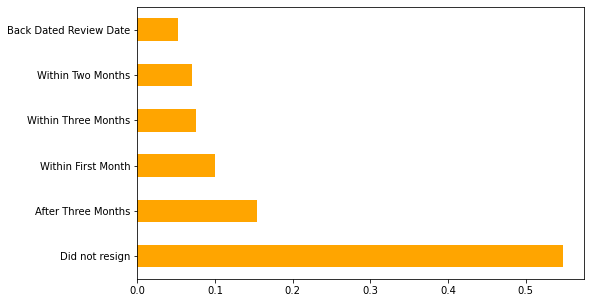

In [199]:
df_comparison_Yellow['Attrition Bucket'].value_counts(normalize = True).plot(kind='barh', figsize=(8,5), color='orange')

## What if ZTP is a Orange Category?

In [200]:
df_comparison_Orange = df_Attrition[['Name']].drop_duplicates()

In [201]:
df_comparison_Orange.shape

(3543, 1)

In [202]:
df_latestZTP = df_ZTP[df_ZTP['Violation_Category'] == 'Airbnb ZT - Orange'].sort_values(by = ['Review_Date'], ascending = False)
df_latestZTP = df_latestZTP.drop_duplicates(subset = 'Ambassador_Name', keep = 'first')

In [203]:
df_comparison_Orange = pd.merge(df_comparison_Orange, 
                         df_latestZTP[['Ambassador_Name', 'Review_Date']],
                         how = 'left',
                         left_on = 'Name', 
                         right_on = 'Ambassador_Name').drop('Ambassador_Name', axis = 1)

In [204]:
df_comparison_Orange.shape

(3543, 2)

In [205]:
df_latestAttrition = df_Attrition.sort_values(by = ['Date_Resignation'], ascending = False)
df_latestAttrition = df_latestAttrition.drop_duplicates(subset = 'Name', keep = 'first')

In [206]:
df_comparison_Orange = pd.merge(df_comparison_Orange, 
                         df_latestAttrition[['Name', 'Date_Resignation']],
                         how = 'left')

In [207]:
df_comparison_Orange.shape

(3543, 3)

In [208]:
df_comparison_Orange

Name Review_Date Date_Resignation
0         Cardona, Delfin John         NaN              NaN
1     Aguilar, Christian Roque         NaN              NaN
2         Tan, Romeo Christian  2022-07-27              NaN
3          Ruiles, Vernie Jean  2022-09-17       2022-11-14
4              Generoso, Marie  2022-11-08       2022-11-14
...                        ...         ...              ...
3538           Garcia, Jacklyn         NaN       2022-01-05
3539       Garcia, Kathryn Ann         NaN              NaN
3540           Magbago, Chelou         NaN       2022-01-04
3541           Paler, Queennie         NaN       2022-01-25
3542    Policarpio, Jalen Yana         NaN       2021-12-29

[3543 rows x 3 columns]

In [209]:
df_comparison_Orange.loc[df_comparison_Orange['Review_Date'].isnull(), 'ZTP'] = 0
df_comparison_Orange.loc[~df_comparison_Orange['Review_Date'].isnull(), 'ZTP'] = 1

Since we want to know the relationship if getting a ZTP versus attrition, let's only focus on those who incrurOrange a ZTP

In [210]:
df_comparison_Orange = df_comparison_Orange[df_comparison_Orange['ZTP'] == 1]

In [211]:
df_comparison_Orange.loc[df_comparison_Orange['Date_Resignation'].isnull(), 'Attrition'] = 0
df_comparison_Orange.loc[~df_comparison_Orange['Date_Resignation'].isnull(), 'Attrition'] = 1

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\2968782075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Orange.loc[df_comparison_Orange['Date_Resignation'].isnull(), 'Attrition'] = 0


In [212]:
df_comparison_Orange['Review_Date'] = pd.to_datetime(df_comparison_Orange['Review_Date'])
df_comparison_Orange['Date_Resignation'] = pd.to_datetime(df_comparison_Orange['Date_Resignation'])

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\3465192846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Orange['Review_Date'] = pd.to_datetime(df_comparison_Orange['Review_Date'])
C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\3465192846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Orange['Date_Resignation'] = pd.to_datetime(df_comparison_Orange['Date_Resignation'])


In [213]:
df_comparison_Orange['diff_days'] = (df_comparison_Orange['Date_Resignation'] - df_comparison_Orange['Review_Date']) / np.timedelta64(1, 'D')

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\1282204829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Orange['diff_days'] = (df_comparison_Orange['Date_Resignation'] - df_comparison_Orange['Review_Date']) / np.timedelta64(1, 'D')


In [214]:
df_comparison_Orange

Name Review_Date Date_Resignation  ZTP  Attrition  \
2       Tan, Romeo Christian  2022-07-27              NaT  1.0        0.0   
3        Ruiles, Vernie Jean  2022-09-17       2022-11-14  1.0        1.0   
4            Generoso, Marie  2022-11-08       2022-11-14  1.0        1.0   
5           Abelardo, Johres  2022-01-13              NaT  1.0        0.0   
8     Barcenas, Krizzia Kyle  2022-09-28              NaT  1.0        0.0   
...                      ...         ...              ...  ...        ...   
3482         Alisaca, Rechel  2022-01-15       2022-02-04  1.0        1.0   
3483           Varilla, Ruby  2022-01-29       2022-01-25  1.0        1.0   
3495          Zabala, Louise  2022-01-29       2022-01-31  1.0        1.0   
3508            Borja, Caryl  2022-01-11       2022-01-23  1.0        1.0   
3519           Eugenio, Karl  2022-01-05       2022-01-18  1.0        1.0   

      diff_days  
2           NaN  
3          58.0  
4           6.0  
5           NaN  
8           NaN  
...         ...  
3482       20.0  
3483       -4.0  
3495        2.0  
3508       12.0  
3519       13.0  

[2170 rows x 6 columns]

In [215]:
df_comparison_Orange[df_comparison_Orange['diff_days'] < 0]

Name Review_Date Date_Resignation  ZTP  Attrition  \
18     Banilad, Christian Jie  2022-09-20       2022-08-13  1.0        1.0   
88               Espina, Kaye  2022-10-14       2022-10-11  1.0        1.0   
126             Reyes, Alexis  2022-10-04       2020-06-04  1.0        1.0   
149          Nicosa, Feannmae  2022-09-27       2022-08-29  1.0        1.0   
173      Gallego, Vince Skyle  2022-09-27       2022-07-14  1.0        1.0   
...                       ...         ...              ...  ...        ...   
3131      Ricaforte, Angeloux  2022-04-28       2022-04-27  1.0        1.0   
3178             Ang, Roxanne  2022-02-25       2022-01-10  1.0        1.0   
3198            Beltran, Syra  2022-04-30       2022-04-27  1.0        1.0   
3368  Acosta, Anthony Geraldo  2022-02-04       2022-02-03  1.0        1.0   
3483            Varilla, Ruby  2022-01-29       2022-01-25  1.0        1.0   

      diff_days  
18        -38.0  
88         -3.0  
126      -852.0  
149       -29.0  
173       -75.0  
...         ...  
3131       -1.0  
3178      -46.0  
3198       -3.0  
3368       -1.0  
3483       -4.0  

[159 rows x 6 columns]

In [216]:
df_comparison_Orange.loc[(df_comparison_Orange['diff_days'] < 0), 'Attrition Bucket'] = "Back Dated Review Date"
df_comparison_Orange.loc[df_comparison_Orange['diff_days'].isnull(), 'Attrition Bucket'] = "Did not resign"
df_comparison_Orange.loc[(df_comparison_Orange['diff_days'] == 0), 'Attrition Bucket'] = "Did not resign"
df_comparison_Orange.loc[df_comparison_Orange['diff_days'].isnull(), 'Attrition Bucket'] = "Did not resign"
df_comparison_Orange.loc[(df_comparison_Orange['diff_days'] >= 1) & 
                  (df_comparison_Orange['diff_days'] <= 30), 'Attrition Bucket'] = "Within First Month"
df_comparison_Orange.loc[(df_comparison_Orange['diff_days'] >= 31) & 
                  (df_comparison_Orange['diff_days'] <= 60), 'Attrition Bucket'] = "Within Two Months"
df_comparison_Orange.loc[(df_comparison_Orange['diff_days'] >= 61) & 
                  (df_comparison_Orange['diff_days'] <= 90), 'Attrition Bucket'] = "Within Three Months"
df_comparison_Orange.loc[df_comparison_Orange['diff_days'] >= 91, 'Attrition Bucket'] = "After Three Months"

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\2195447309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Orange.loc[(df_comparison_Orange['diff_days'] < 0), 'Attrition Bucket'] = "Back Dated Review Date"


In [217]:
df_comparison_Orange

Name Review_Date Date_Resignation  ZTP  Attrition  \
2       Tan, Romeo Christian  2022-07-27              NaT  1.0        0.0   
3        Ruiles, Vernie Jean  2022-09-17       2022-11-14  1.0        1.0   
4            Generoso, Marie  2022-11-08       2022-11-14  1.0        1.0   
5           Abelardo, Johres  2022-01-13              NaT  1.0        0.0   
8     Barcenas, Krizzia Kyle  2022-09-28              NaT  1.0        0.0   
...                      ...         ...              ...  ...        ...   
3482         Alisaca, Rechel  2022-01-15       2022-02-04  1.0        1.0   
3483           Varilla, Ruby  2022-01-29       2022-01-25  1.0        1.0   
3495          Zabala, Louise  2022-01-29       2022-01-31  1.0        1.0   
3508            Borja, Caryl  2022-01-11       2022-01-23  1.0        1.0   
3519           Eugenio, Karl  2022-01-05       2022-01-18  1.0        1.0   

      diff_days        Attrition Bucket  
2           NaN          Did not resign  
3          58.0       Within Two Months  
4           6.0      Within First Month  
5           NaN          Did not resign  
8           NaN          Did not resign  
...         ...                     ...  
3482       20.0      Within First Month  
3483       -4.0  Back Dated Review Date  
3495        2.0      Within First Month  
3508       12.0      Within First Month  
3519       13.0      Within First Month  

[2170 rows x 7 columns]

<AxesSubplot:>

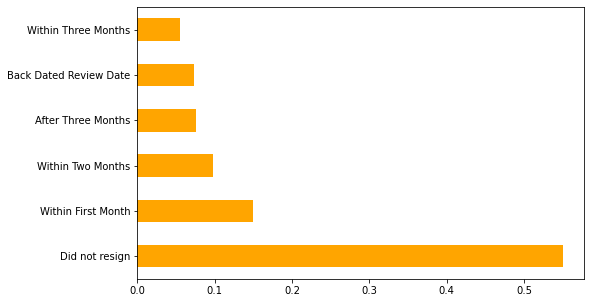

In [218]:
df_comparison_Orange['Attrition Bucket'].value_counts(normalize = True).plot(kind='barh', figsize=(8,5), color='orange')

## What if ZTP is a Red Category?

In [219]:
df_comparison_Red = df_Attrition[['Name']].drop_duplicates()

In [220]:
df_comparison_Red.shape

(3543, 1)

In [221]:
df_latestZTP = df_ZTP[df_ZTP['Violation_Category'] == 'Airbnb ZT - Red'].sort_values(by = ['Review_Date'], ascending = False)
df_latestZTP = df_latestZTP.drop_duplicates(subset = 'Ambassador_Name', keep = 'first')

In [222]:
df_comparison_Red = pd.merge(df_comparison_Red, 
                         df_latestZTP[['Ambassador_Name', 'Review_Date']],
                         how = 'left',
                         left_on = 'Name', 
                         right_on = 'Ambassador_Name').drop('Ambassador_Name', axis = 1)

In [223]:
df_comparison_Red.shape

(3543, 2)

In [224]:
df_latestAttrition = df_Attrition.sort_values(by = ['Date_Resignation'], ascending = False)
df_latestAttrition = df_latestAttrition.drop_duplicates(subset = 'Name', keep = 'first')

In [225]:
df_comparison_Red = pd.merge(df_comparison_Red, 
                         df_latestAttrition[['Name', 'Date_Resignation']],
                         how = 'left')

In [226]:
df_comparison_Red.shape

(3543, 3)

In [227]:
df_comparison_Red

Name Review_Date Date_Resignation
0         Cardona, Delfin John         NaN              NaN
1     Aguilar, Christian Roque         NaN              NaN
2         Tan, Romeo Christian         NaN              NaN
3          Ruiles, Vernie Jean         NaN       2022-11-14
4              Generoso, Marie         NaN       2022-11-14
...                        ...         ...              ...
3538           Garcia, Jacklyn         NaN       2022-01-05
3539       Garcia, Kathryn Ann         NaN              NaN
3540           Magbago, Chelou         NaN       2022-01-04
3541           Paler, Queennie         NaN       2022-01-25
3542    Policarpio, Jalen Yana         NaN       2021-12-29

[3543 rows x 3 columns]

In [228]:
df_comparison_Red.loc[df_comparison_Red['Review_Date'].isnull(), 'ZTP'] = 0
df_comparison_Red.loc[~df_comparison_Red['Review_Date'].isnull(), 'ZTP'] = 1

Since we want to know the relationship if getting a ZTP versus attrition, let's only focus on those who incrurRed a ZTP

In [229]:
df_comparison_Red = df_comparison_Red[df_comparison_Red['ZTP'] == 1]

In [230]:
df_comparison_Red.loc[df_comparison_Red['Date_Resignation'].isnull(), 'Attrition'] = 0
df_comparison_Red.loc[~df_comparison_Red['Date_Resignation'].isnull(), 'Attrition'] = 1

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\1788419486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Red.loc[df_comparison_Red['Date_Resignation'].isnull(), 'Attrition'] = 0


In [231]:
df_comparison_Red['Review_Date'] = pd.to_datetime(df_comparison_Red['Review_Date'])
df_comparison_Red['Date_Resignation'] = pd.to_datetime(df_comparison_Red['Date_Resignation'])

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\2358923722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Red['Review_Date'] = pd.to_datetime(df_comparison_Red['Review_Date'])
C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\2358923722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Red['Date_Resignation'] = pd.to_datetime(df_comparison_Red['Date_Resignation'])


In [232]:
df_comparison_Red['diff_days'] = (df_comparison_Red['Date_Resignation'] - df_comparison_Red['Review_Date']) / np.timedelta64(1, 'D')

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\3899226795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Red['diff_days'] = (df_comparison_Red['Date_Resignation'] - df_comparison_Red['Review_Date']) / np.timedelta64(1, 'D')


In [233]:
df_comparison_Red

Name Review_Date Date_Resignation  ZTP  Attrition  \
45                Botones, Irish  2022-09-27       2022-11-14  1.0        1.0   
96               Vargas, Eduardo  2022-02-23              NaT  1.0        0.0   
128               Delada, Rafael  2022-10-11              NaT  1.0        0.0   
253       Lagunzad, Sheila Marie  2022-10-06              NaT  1.0        0.0   
445       Manalo, Cklint Louisse  2022-08-12              NaT  1.0        0.0   
...                          ...         ...              ...  ...        ...   
3213            Geronimo, Janela  2022-02-01       2022-03-08  1.0        1.0   
3470              Enriquez, John  2022-01-31       2022-01-10  1.0        1.0   
3474  Mendoza, Nino John Raymond  2022-01-31       2022-01-11  1.0        1.0   
3495              Zabala, Louise  2022-02-01       2022-01-31  1.0        1.0   
3524               Perez, Alyssa  2022-01-30       2022-01-27  1.0        1.0   

      diff_days  
45         48.0  
96          NaN  
128         NaN  
253         NaN  
445         NaN  
...         ...  
3213       35.0  
3470      -21.0  
3474      -20.0  
3495       -1.0  
3524       -3.0  

[62 rows x 6 columns]

In [234]:
df_comparison_Red[df_comparison_Red['diff_days'] < 0]

Name Review_Date Date_Resignation  ZTP  Attrition  \
817              Deguzman, Alwin  2022-03-13       2021-11-09  1.0        1.0   
1980                Tolin, Jelly  2022-03-26       2022-01-14  1.0        1.0   
3470              Enriquez, John  2022-01-31       2022-01-10  1.0        1.0   
3474  Mendoza, Nino John Raymond  2022-01-31       2022-01-11  1.0        1.0   
3495              Zabala, Louise  2022-02-01       2022-01-31  1.0        1.0   
3524               Perez, Alyssa  2022-01-30       2022-01-27  1.0        1.0   

      diff_days  
817      -124.0  
1980      -71.0  
3470      -21.0  
3474      -20.0  
3495       -1.0  
3524       -3.0

In [235]:
df_comparison_Red.loc[(df_comparison_Red['diff_days'] < 0), 'Attrition Bucket'] = "Back Dated Review Date"
df_comparison_Red.loc[df_comparison_Red['diff_days'].isnull(), 'Attrition Bucket'] = "Did not resign"
df_comparison_Red.loc[(df_comparison_Red['diff_days'] == 0), 'Attrition Bucket'] = "Did not resign"
df_comparison_Red.loc[df_comparison_Red['diff_days'].isnull(), 'Attrition Bucket'] = "Did not resign"
df_comparison_Red.loc[(df_comparison_Red['diff_days'] >= 1) & 
                  (df_comparison_Red['diff_days'] <= 30), 'Attrition Bucket'] = "Within First Month"
df_comparison_Red.loc[(df_comparison_Red['diff_days'] >= 31) & 
                  (df_comparison_Red['diff_days'] <= 60), 'Attrition Bucket'] = "Within Two Months"
df_comparison_Red.loc[(df_comparison_Red['diff_days'] >= 61) & 
                  (df_comparison_Red['diff_days'] <= 90), 'Attrition Bucket'] = "Within Three Months"
df_comparison_Red.loc[df_comparison_Red['diff_days'] >= 91, 'Attrition Bucket'] = "After Three Months"

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\2480619047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_Red.loc[(df_comparison_Red['diff_days'] < 0), 'Attrition Bucket'] = "Back Dated Review Date"


In [236]:
df_comparison_Red

Name Review_Date Date_Resignation  ZTP  Attrition  \
45                Botones, Irish  2022-09-27       2022-11-14  1.0        1.0   
96               Vargas, Eduardo  2022-02-23              NaT  1.0        0.0   
128               Delada, Rafael  2022-10-11              NaT  1.0        0.0   
253       Lagunzad, Sheila Marie  2022-10-06              NaT  1.0        0.0   
445       Manalo, Cklint Louisse  2022-08-12              NaT  1.0        0.0   
...                          ...         ...              ...  ...        ...   
3213            Geronimo, Janela  2022-02-01       2022-03-08  1.0        1.0   
3470              Enriquez, John  2022-01-31       2022-01-10  1.0        1.0   
3474  Mendoza, Nino John Raymond  2022-01-31       2022-01-11  1.0        1.0   
3495              Zabala, Louise  2022-02-01       2022-01-31  1.0        1.0   
3524               Perez, Alyssa  2022-01-30       2022-01-27  1.0        1.0   

      diff_days        Attrition Bucket  
45         48.0       Within Two Months  
96          NaN          Did not resign  
128         NaN          Did not resign  
253         NaN          Did not resign  
445         NaN          Did not resign  
...         ...                     ...  
3213       35.0       Within Two Months  
3470      -21.0  Back Dated Review Date  
3474      -20.0  Back Dated Review Date  
3495       -1.0  Back Dated Review Date  
3524       -3.0  Back Dated Review Date  

[62 rows x 7 columns]

<AxesSubplot:>

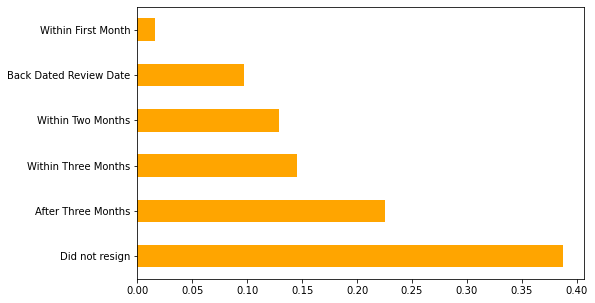

In [237]:
df_comparison_Red['Attrition Bucket'].value_counts(normalize = True).plot(kind='barh', figsize=(8,5), color='orange')

## Regression Analysis

In [288]:
df_Regression = df_Attrition[['EID', 'Name', 'Date_Month', 'Hire_Date', 'Date_Resignation', 'Yellow', 'Orange', 'Red']]
df_Regression[['Yellow', 'Orange', 'Red']] = df_Regression[['Yellow', 'Orange', 'Red']].fillna(0)

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\483511981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Regression[['Yellow', 'Orange', 'Red']] = df_Regression[['Yellow', 'Orange', 'Red']].fillna(0)


In [289]:
df_Regression['ZTP'] = df_Regression['Yellow'] + df_Regression['Orange'] + df_Regression['Red']

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\2835569181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Regression['ZTP'] = df_Regression['Yellow'] + df_Regression['Orange'] + df_Regression['Red']


In [290]:
df_Regression['month_year'] = pd.to_datetime(df_Regression['Date_Month']).dt.to_period('M')

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\135667529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Regression['month_year'] = pd.to_datetime(df_Regression['Date_Month']).dt.to_period('M')


In [291]:
df_Regression.loc[df_Regression['Date_Resignation'].isnull(), 'Attrition'] = 0
df_Regression.loc[~df_Regression['Date_Resignation'].isnull(), 'Attrition'] = 1

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_17608\4160747704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Regression.loc[df_Regression['Date_Resignation'].isnull(), 'Attrition'] = 0


In [292]:
df_Regression

EID                      Name  Date_Month   Hire_Date Date_Resignation  \
0      NaN      Cardona, Delfin John  2022-11-01  2019-05-06              NaN   
1      NaN  Aguilar, Christian Roque  2022-11-01  2021-05-16              NaN   
2      NaN      Tan, Romeo Christian  2022-11-01  2022-05-19              NaN   
3      NaN       Ruiles, Vernie Jean  2022-11-01  2022-06-09       2022-11-14   
4      NaN           Generoso, Marie  2022-11-01  2022-06-11       2022-11-14   
...    ...                       ...         ...         ...              ...   
21747  NaN       Garcia, Kathryn Ann  2022-01-01         NaN              NaN   
21748  NaN           Magbago, Chelou  2022-01-01         NaN       2022-01-04   
21749  NaN           Monoy, Rochelle  2022-01-01         NaN       2022-10-02   
21750  NaN           Paler, Queennie  2022-01-01         NaN       2022-01-25   
21751  NaN    Policarpio, Jalen Yana  2022-01-01         NaN       2021-12-29   

       Yellow  Orange  Red  ZTP month_year  Attrition  
0         0.0     0.0  0.0  0.0    2022-11        0.0  
1         0.0     0.0  0.0  0.0    2022-11        0.0  
2         0.0     0.0  0.0  0.0    2022-11        0.0  
3         0.0     0.0  0.0  0.0    2022-11        1.0  
4         0.0     1.0  0.0  1.0    2022-11        1.0  
...       ...     ...  ...  ...        ...        ...  
21747     0.0     0.0  0.0  0.0    2022-01        0.0  
21748     0.0     0.0  0.0  0.0    2022-01        1.0  
21749     0.0     0.0  0.0  0.0    2022-01        1.0  
21750     0.0     0.0  0.0  0.0    2022-01        1.0  
21751     0.0     0.0  0.0  0.0    2022-01        1.0  

[21752 rows x 11 columns]

Text(0.5, 0, 'Number of ZTP Violations')

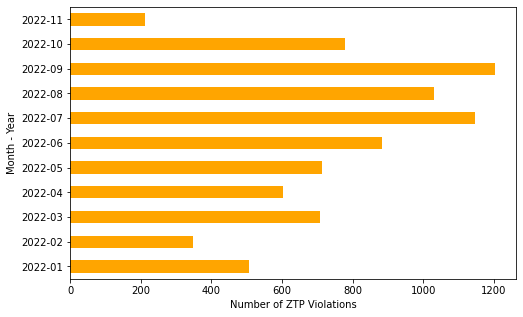

In [293]:
df_Regression.groupby('month_year')['ZTP'].apply(lambda x : x.astype(int).sum()).plot(kind='barh', figsize=(8,5), color='orange')
plt.ylabel("Month - Year")
plt.xlabel("Number of ZTP Violations")

Text(0.5, 0, 'Number of Resigned Employees')

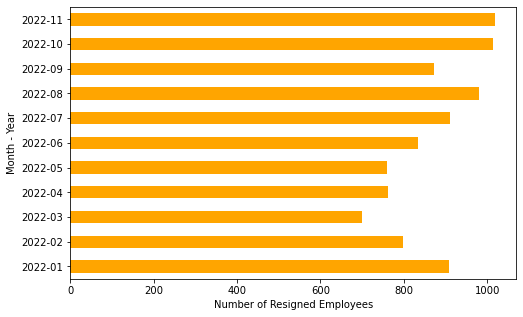

In [294]:
df_Regression.groupby('month_year')['Attrition'].apply(lambda x : x.astype(int).sum()).plot(kind='barh', figsize=(8,5), color='orange')
plt.ylabel("Month - Year")
plt.xlabel("Number of Resigned Employees")

In [295]:
df_Regression

EID                      Name  Date_Month   Hire_Date Date_Resignation  \
0      NaN      Cardona, Delfin John  2022-11-01  2019-05-06              NaN   
1      NaN  Aguilar, Christian Roque  2022-11-01  2021-05-16              NaN   
2      NaN      Tan, Romeo Christian  2022-11-01  2022-05-19              NaN   
3      NaN       Ruiles, Vernie Jean  2022-11-01  2022-06-09       2022-11-14   
4      NaN           Generoso, Marie  2022-11-01  2022-06-11       2022-11-14   
...    ...                       ...         ...         ...              ...   
21747  NaN       Garcia, Kathryn Ann  2022-01-01         NaN              NaN   
21748  NaN           Magbago, Chelou  2022-01-01         NaN       2022-01-04   
21749  NaN           Monoy, Rochelle  2022-01-01         NaN       2022-10-02   
21750  NaN           Paler, Queennie  2022-01-01         NaN       2022-01-25   
21751  NaN    Policarpio, Jalen Yana  2022-01-01         NaN       2021-12-29   

       Yellow  Orange  Red  ZTP month_year  Attrition  
0         0.0     0.0  0.0  0.0    2022-11        0.0  
1         0.0     0.0  0.0  0.0    2022-11        0.0  
2         0.0     0.0  0.0  0.0    2022-11        0.0  
3         0.0     0.0  0.0  0.0    2022-11        1.0  
4         0.0     1.0  0.0  1.0    2022-11        1.0  
...       ...     ...  ...  ...        ...        ...  
21747     0.0     0.0  0.0  0.0    2022-01        0.0  
21748     0.0     0.0  0.0  0.0    2022-01        1.0  
21749     0.0     0.0  0.0  0.0    2022-01        1.0  
21750     0.0     0.0  0.0  0.0    2022-01        1.0  
21751     0.0     0.0  0.0  0.0    2022-01        1.0  

[21752 rows x 11 columns]

In [296]:
df_prediction = df_Regression[df_Regression['month_year'] == "2022-07"]

In [297]:
df_prediction.loc[(df_prediction['Date_Resignation'] >= "2022-07-01") & 
                  (df_prediction['Date_Resignation'] <= "2022-10-31"), 'Attrition'] = 1
df_prediction.loc[~((df_prediction['Date_Resignation'] >= "2022-07-01") &
                    (df_prediction['Date_Resignation'] <= "2022-10-31")), 'Attrition'] = 0 

In [298]:
df_prediction = df_prediction[['Attrition', 'Yellow', 'Orange', 'Red', 'ZTP']]

Number of ZTP Violations vs Attrition

In [405]:
df_prediction_ZTP = df_prediction[['Attrition', 'ZTP']]

<AxesSubplot:>

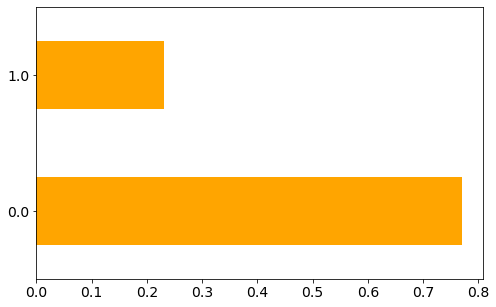

In [413]:
df_prediction_ZTP['Attrition'].value_counts(normalize = True).plot(kind='barh', figsize=(8,5), color='orange')

In [406]:
#Split the data set into x and y data

y_data = df_prediction_ZTP['Attrition']

x_data = df_prediction_ZTP.drop('Attrition', axis = 1)

In [407]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3, random_state=143,                                                     stratify=y)

In [408]:
#Create the model

model = LogisticRegression()

In [409]:
#Train the model and create predictions

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

In [410]:
p_score = precision_score(y_test_data, predictions, pos_label=1)
r_score = recall_score(y_test_data, predictions, pos_label=1)
accuracy = accuracy_score(y_test_data, predictions)
    
print('accuracy:', accuracy)
print('recall:', r_score)
print('precision:', p_score)

accuracy: 0.7702702702702703
recall: 0.006493506493506494
precision: 1.0


<Figure size 432x432 with 0 Axes>

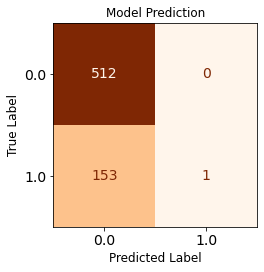

In [411]:
plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 14})
ConfusionMatrixDisplay.from_predictions(y_test_data, predictions,
                                        colorbar=False, cmap='Oranges')
plt.title('Model Prediction', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12);
plt.tight_layout()
plt.savefig('CM_GB.png', dpi=300)


Text(0, 0.5, 'Probability of Attrition')

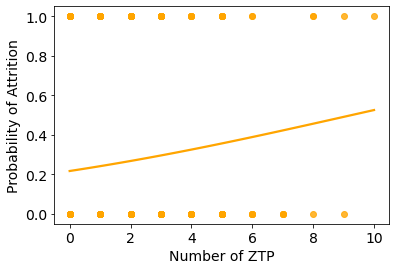

In [412]:
x = df_prediction_ZTP['ZTP']
y = df_prediction_ZTP['Attrition']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df_prediction_ZTP, logistic=True, ci=None, color = "orange")

plt.xlabel('Number of ZTP')
plt.ylabel('Probability of Attrition')

Number of Red Violations vs Attrition

In [370]:
df_prediction_Red = df_prediction[['Attrition', 'Red']]

In [371]:
#Split the data set into x and y data

y_data = df_prediction_Red['Attrition']

x_data = df_prediction_Red.drop('Attrition', axis = 1)

In [372]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [373]:
#Create the model

model = LogisticRegression()

In [374]:
#Train the model and create predictions

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

In [375]:
p_score = precision_score(y_test_data, predictions, pos_label=1)
r_score = recall_score(y_test_data, predictions, pos_label=1)
accuracy = accuracy_score(y_test_data, predictions)
    
print('accuracy:', accuracy)
print('recall:', r_score)
print('precision:', p_score)

accuracy: 0.7732732732732732
recall: 0.0
precision: 0.0


C:\Users\jmbatula\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x432 with 0 Axes>

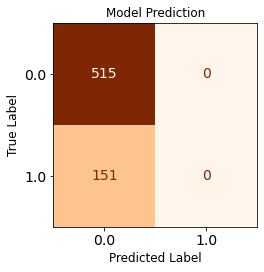

In [376]:
plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 14})
ConfusionMatrixDisplay.from_predictions(y_test_data, predictions,
                                        colorbar=False, cmap='Oranges')
plt.title('Model Prediction', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12);
plt.tight_layout()
plt.savefig('CM_GB.png', dpi=300)


Text(0, 0.5, 'Probability of Attrition')

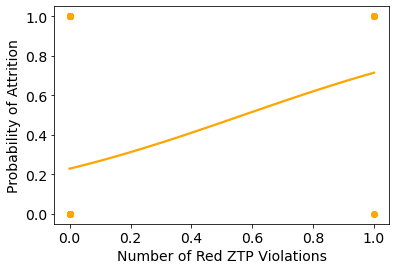

In [377]:
x = df_prediction_Red['Red']
y = df_prediction_Red['Attrition']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df_prediction_ZTP, logistic=True, ci=None, color = "orange")

plt.xlabel('Number of Red ZTP Violations')
plt.ylabel('Probability of Attrition')

Number of Orange Violations vs Attrition

In [378]:
df_prediction_Orange = df_prediction[['Attrition', 'Orange']]

In [379]:
#Split the data set into x and y data

y_data = df_prediction_Orange['Attrition']

x_data = df_prediction_Orange.drop('Attrition', axis = 1)

In [380]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [381]:
#Create the model

model = LogisticRegression()

In [382]:
#Train the model and create predictions

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

In [383]:
p_score = precision_score(y_test_data, predictions, pos_label=1)
r_score = recall_score(y_test_data, predictions, pos_label=1)
accuracy = accuracy_score(y_test_data, predictions)
    
print('accuracy:', accuracy)
print('recall:', r_score)
print('precision:', p_score)

accuracy: 0.7837837837837838
recall: 0.006896551724137931
precision: 1.0


<Figure size 432x432 with 0 Axes>

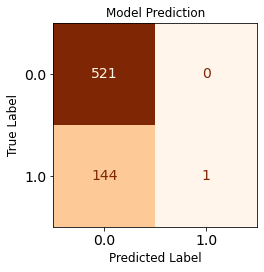

In [384]:
plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 14})
ConfusionMatrixDisplay.from_predictions(y_test_data, predictions,
                                        colorbar=False, cmap='Oranges')
plt.title('Model Prediction', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12);
plt.tight_layout()
plt.savefig('CM_GB.png', dpi=300)


Text(0, 0.5, 'Probability of Attrition')

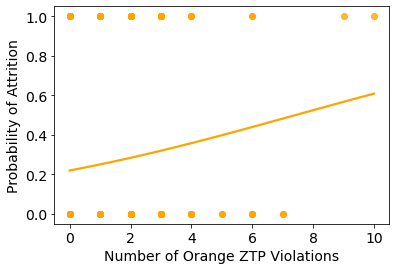

In [385]:
x = df_prediction_Orange['Orange']
y = df_prediction_Orange['Attrition']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df_prediction_ZTP, logistic=True, ci=None, color = "orange")

plt.xlabel('Number of Orange ZTP Violations')
plt.ylabel('Probability of Attrition')

Number of Yellow Violations vs Attrition

In [386]:
df_prediction_Yellow = df_prediction[['Attrition', 'Yellow']]

In [387]:
#Split the data set into x and y data

y_data = df_prediction_Yellow['Attrition']

x_data = df_prediction_Yellow.drop('Attrition', axis = 1)

In [388]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [389]:
#Create the model

model = LogisticRegression()

In [390]:
#Train the model and create predictions

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

In [391]:
p_score = precision_score(y_test_data, predictions, pos_label=1)
r_score = recall_score(y_test_data, predictions, pos_label=1)
accuracy = accuracy_score(y_test_data, predictions)
    
print('accuracy:', accuracy)
print('recall:', r_score)
print('precision:', p_score)

accuracy: 0.7552552552552553
recall: 0.0
precision: 0.0


C:\Users\jmbatula\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x432 with 0 Axes>

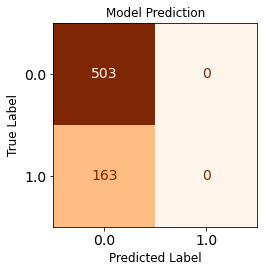

In [392]:
plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 14})
ConfusionMatrixDisplay.from_predictions(y_test_data, predictions,
                                        colorbar=False, cmap='Oranges')
plt.title('Model Prediction', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12);
plt.tight_layout()
plt.savefig('CM_GB.png', dpi=300)


Text(0, 0.5, 'Probability of Attrition')

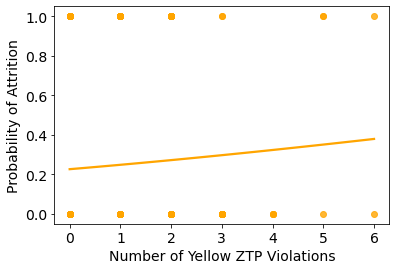

In [393]:
x = df_prediction_Yellow['Yellow']
y = df_prediction_Yellow['Attrition']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df_prediction_ZTP, logistic=True, ci=None, color = "orange")

plt.xlabel('Number of Yellow ZTP Violations')
plt.ylabel('Probability of Attrition')

Number of ZTP Violations (not aggregated) vs Attrition

In [394]:
df_prediction_ZTP_Individual = df_prediction[['Attrition', 'Red', 'Orange', 'Yellow']]

In [395]:
#Split the data set into x and y data

y_data = df_prediction_ZTP_Individual['Attrition']

x_data = df_prediction_ZTP_Individual.drop('Attrition', axis = 1)

In [396]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [397]:
#Create the model

model = LogisticRegression()

In [398]:
#Train the model and create predictions

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

In [399]:
p_score = precision_score(y_test_data, predictions, pos_label=1)
r_score = recall_score(y_test_data, predictions, pos_label=1)
accuracy = accuracy_score(y_test_data, predictions)
    
print('accuracy:', accuracy)
print('recall:', r_score)
print('precision:', p_score)

accuracy: 0.7537537537537538
recall: 0.0
precision: 0.0


<Figure size 432x432 with 0 Axes>

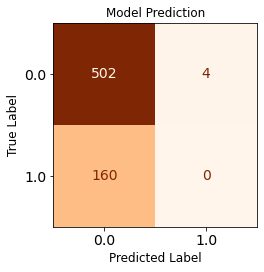

In [400]:
plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 14})
ConfusionMatrixDisplay.from_predictions(y_test_data, predictions,
                                        colorbar=False, cmap='Oranges')
plt.title('Model Prediction', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12);
plt.tight_layout()
plt.savefig('CM_GB.png', dpi=300)
